In [4]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
df = pd.read_csv('gene_high_throughput_sequencing.csv')

In [10]:
df.head()

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917


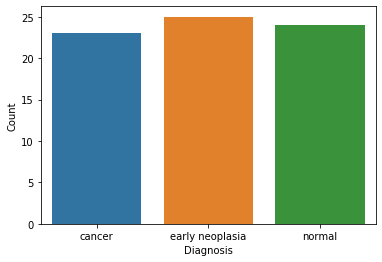

In [11]:
types, cnts = np.unique(df.Diagnosis.values, return_counts=True)
_ = sns.barplot(types, cnts)
_ = plt.xlabel('Diagnosis')
_ = plt.ylabel('Count')

In [7]:
types

array(['cancer', 'early neoplasia', 'normal'], dtype=object)

In [12]:
gen_normal = df.query("Diagnosis == 'normal'")
gen_neoplasia = df.query("Diagnosis == 'early neoplasia'")
gen_cancer = df.query("Diagnosis == 'cancer'")

In [22]:
print('Shapiro-Wilk test for samples')

sw_normal = gen_normal.iloc[:,2:].apply(stats.shapiro, axis=0)
sw_normal_p = [p for _, p in sw_normal]
_, sw_normal_p_corr, _, _ = multipletests(sw_normal_p, method='fdr_bh')

sw_neoplasia = gen_neoplasia.iloc[:,2:].apply(stats.shapiro, axis=0)
sw_neoplasia_p = [p for _, p in sw_neoplasia]
_, sw_neoplasia_p_corr, _, _ = multipletests(sw_neoplasia_p, method='fdr_bh')

sw_cancer = gen_cancer.iloc[:,2:].apply(stats.shapiro, axis=0)
sw_cancer_p = [p for _, p in sw_cancer]
_, sw_cancer_p_corr, _, _ = multipletests(sw_cancer_p, method='fdr_bh')

print('Mean corrected p-value for "normal": %.4f' % sw_normal_p_corr.mean())
print('Mean corrected p-value for "early neoplasia": %.4f' % sw_neoplasia_p_corr.mean())
print('Mean corrected p-value for "cancer": %.4f' % sw_cancer_p_corr.mean())

Shapiro-Wilk test for samples
Mean corrected p-value for "normal": 0.4892
Mean corrected p-value for "early neoplasia": 0.5025
Mean corrected p-value for "cancer": 0.4594


In [23]:
tt_ind_normal_neoplasia = stats.ttest_ind(gen_normal.iloc[:,2:], gen_neoplasia.iloc[:,2:], equal_var = False)
tt_ind_normal_neoplasia_p = tt_ind_normal_neoplasia[1]

tt_ind_neoplasia_cancer = stats.ttest_ind(gen_neoplasia.iloc[:,2:], gen_cancer.iloc[:,2:], equal_var = False)
tt_ind_neoplasia_cancer_p = tt_ind_neoplasia_cancer[1]

tt_ind_normal_neoplasia_p_5 = tt_ind_normal_neoplasia_p[np.where(tt_ind_normal_neoplasia_p < 0.05)].shape[0]
tt_ind_neoplasia_cancer_p_5 = tt_ind_neoplasia_cancer_p[np.where(tt_ind_neoplasia_cancer_p < 0.05)].shape[0]

print('Normal vs neoplasia samples p-values number below 0.05: %d' % tt_ind_normal_neoplasia_p_5)
print('Neoplasia vs cancer samples p-values number below 0.05: %d' % tt_ind_neoplasia_cancer_p_5)

Normal vs neoplasia samples p-values number below 0.05: 1575
Neoplasia vs cancer samples p-values number below 0.05: 3490


In [25]:
with open('answer1.txt', 'w') as fout:
    fout.write(str(tt_ind_normal_neoplasia_p_5))
    
with open('answer2.txt', 'w') as fout:
    fout.write(str(tt_ind_neoplasia_cancer_p_5))

4

4

In [26]:

#Holm correction
_, tt_ind_normal_neoplasia_p_corr, _, _ = multipletests(tt_ind_normal_neoplasia_p, method='holm')
_, tt_ind_neoplasia_cancer_p_corr, _, _ = multipletests(tt_ind_neoplasia_cancer_p, method='holm')

#Bonferroni correction
p_corr = np.array([tt_ind_normal_neoplasia_p_corr, tt_ind_neoplasia_cancer_p_corr])
_, p_corr_bonf, _, _ = multipletests(p_corr, is_sorted=True, method='bonferroni')

p_corr_bonf_normal_neoplasia_p_5 = p_corr_bonf[0][np.where(p_corr_bonf[0] < 0.05)].shape[0]
p_corr_bonf_neoplasia_cancer_p_5 = p_corr_bonf[1][np.where(p_corr_bonf[1] < 0.05)].shape[0]

print('Normal vs neoplasia samples p-values number below 0.05: %d' % p_corr_bonf_normal_neoplasia_p_5)
print('Neoplasia vs cancer samples p-values number below 0.05: %d' % p_corr_bonf_neoplasia_cancer_p_5)

Normal vs neoplasia samples p-values number below 0.05: 2
Neoplasia vs cancer samples p-values number below 0.05: 79


In [27]:
def fold_change(C, T, limit=1.5):
    '''
    C - control sample
    T - treatment sample
    '''
    if T >= C:
        fc_stat = T / C
    else:
        fc_stat = -C / T
    
    return (np.abs(fc_stat) > limit), fc_stat

In [28]:
#Normal vs neoplasia samples
gen_p_corr_bonf_normal_p_5 = gen_normal.iloc[:,2:].iloc[:, np.where(p_corr_bonf[0] < 0.05)[0]]
gen_p_corr_bonf_neoplasia0_p_5 = gen_neoplasia.iloc[:,2:].iloc[:, np.where(p_corr_bonf[0] < 0.05)[0]]

fc_corr_bonf_normal_neoplasia_p_5 = 0
for norm, neopl in zip(gen_p_corr_bonf_normal_p_5.mean(), gen_p_corr_bonf_neoplasia0_p_5.mean()):
    accept, _ = fold_change(norm, neopl)
    if accept: fc_corr_bonf_normal_neoplasia_p_5 += 1

#Neoplasia vs cancer samples
gen_p_corr_bonf_neoplasia1_p_5 = gen_neoplasia.iloc[:,2:].iloc[:, np.where(p_corr_bonf[1] < 0.05)[0]]
gen_p_corr_bonf_cancer_p_5 = gen_cancer.iloc[:,2:].iloc[:, np.where(p_corr_bonf[1] < 0.05)[0]]

fc_corr_bonf_neoplasia_cancer_p_5 = 0
for neopl, canc in zip(gen_p_corr_bonf_neoplasia1_p_5.mean(), gen_p_corr_bonf_cancer_p_5.mean()):
    accept, _ = fold_change(neopl, canc)
    if accept: fc_corr_bonf_neoplasia_cancer_p_5 += 1

print('Normal vs neoplasia samples fold change above 1.5: %d' % fc_corr_bonf_normal_neoplasia_p_5)
print('Neoplasia vs cancer samples fold change above 1.5: %d' % fc_corr_bonf_neoplasia_cancer_p_5)

Normal vs neoplasia samples fold change above 1.5: 2
Neoplasia vs cancer samples fold change above 1.5: 77


In [29]:
with open('answer3.txt', 'w') as fout:
    fout.write(str(fc_corr_bonf_normal_neoplasia_p_5))
    
with open('answer4.txt', 'w') as fout:
    fout.write(str(fc_corr_bonf_neoplasia_cancer_p_5))

1

2

In [30]:
#Benjamini-Hochberg correction
_, tt_ind_normal_neoplasia_p_corr, _, _ = multipletests(tt_ind_normal_neoplasia_p, method='fdr_bh')
_, tt_ind_neoplasia_cancer_p_corr, _, _ = multipletests(tt_ind_neoplasia_cancer_p, method='fdr_bh')

#Bonferroni correction
p_corr = np.array([tt_ind_normal_neoplasia_p_corr, tt_ind_neoplasia_cancer_p_corr])
_, p_corr_bonf, _, _ = multipletests(p_corr, is_sorted=True, method='bonferroni')

p_corr_bonf_normal_neoplasia_p_5 = p_corr_bonf[0][np.where(p_corr_bonf[0] < 0.05)].shape[0]
p_corr_bonf_neoplasia_cancer_p_5 = p_corr_bonf[1][np.where(p_corr_bonf[1] < 0.05)].shape[0]

print('Normal vs neoplasia samples p-values number below 0.05: %d' % p_corr_bonf_normal_neoplasia_p_5)
print('Neoplasia vs cancer samples p-values number below 0.05: %d' % p_corr_bonf_neoplasia_cancer_p_5)

Normal vs neoplasia samples p-values number below 0.05: 4
Neoplasia vs cancer samples p-values number below 0.05: 832


In [31]:
#Normal vs neoplasia samples
gen_p_corr_bonf_normal_p_5 = gen_normal.iloc[:,2:].iloc[:, np.where(p_corr_bonf[0] < 0.05)[0]]
gen_p_corr_bonf_neoplasia0_p_5 = gen_neoplasia.iloc[:,2:].iloc[:, np.where(p_corr_bonf[0] < 0.05)[0]]

fc_corr_bonf_normal_neoplasia_p_5 = 0
for norm, neopl in zip(gen_p_corr_bonf_normal_p_5.mean(), gen_p_corr_bonf_neoplasia0_p_5.mean()):
    accept, _ = fold_change(norm, neopl)
    if accept: fc_corr_bonf_normal_neoplasia_p_5 += 1

#Neoplasia vs cancer samples
gen_p_corr_bonf_neoplasia1_p_5 = gen_neoplasia.iloc[:,2:].iloc[:, np.where(p_corr_bonf[1] < 0.05)[0]]
gen_p_corr_bonf_cancer_p_5 = gen_cancer.iloc[:,2:].iloc[:, np.where(p_corr_bonf[1] < 0.05)[0]]

fc_corr_bonf_neoplasia_cancer_p_5 = 0
for neopl, canc in zip(gen_p_corr_bonf_neoplasia1_p_5.mean(), gen_p_corr_bonf_cancer_p_5.mean()):
    accept, _ = fold_change(neopl, canc)
    if accept: fc_corr_bonf_neoplasia_cancer_p_5 += 1

print('Normal vs neoplasia samples fold change above 1.5: %d' % fc_corr_bonf_normal_neoplasia_p_5)
print('Neoplasia vs cancer samples fold change above 1.5: %d' % fc_corr_bonf_neoplasia_cancer_p_5)

Normal vs neoplasia samples fold change above 1.5: 4
Neoplasia vs cancer samples fold change above 1.5: 524


In [32]:
with open('answer5.txt', 'w') as fout:
    fout.write(str(fc_corr_bonf_normal_neoplasia_p_5))
    
with open('answer6.txt', 'w') as fout:
    fout.write(str(fc_corr_bonf_neoplasia_cancer_p_5))

1

3